In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df=pd.read_csv('sonar.csv')

In [3]:
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [5]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

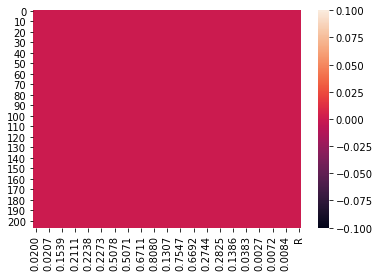

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

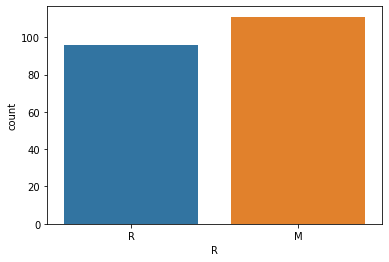

In [9]:
sns.countplot(x='R',data=df)
plt.show()

In [10]:
#Seprating input and output
df_x=df.drop(columns=['R'])
df_y=df[['R']]

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['R']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [12]:
df.corr()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302,-0.270482
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010,-0.231670
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256,-0.192589
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262,-0.247935
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220,-0.224809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0180,0.319663,0.282822,0.383945,0.349411,0.218004,0.163433,0.183382,0.266743,0.186347,0.141211,...,0.202905,0.315943,0.358746,0.392768,0.509056,1.000000,0.513086,0.433130,0.295369,-0.010152
0.0084,0.368413,0.353061,0.334122,0.345537,0.238749,0.204027,0.242632,0.287568,0.232078,0.212272,...,0.310989,0.371290,0.404345,0.503677,0.465640,0.513086,1.000000,0.550223,0.330400,-0.185066
0.0090,0.357611,0.352260,0.425100,0.421410,0.290793,0.220678,0.183279,0.194209,0.096662,0.058260,...,0.300562,0.346915,0.447086,0.454032,0.431902,0.433130,0.550223,1.000000,0.644140,-0.132088
0.0032,0.346302,0.359010,0.374256,0.399262,0.255220,0.178027,0.224536,0.147350,0.099233,0.097528,...,0.192609,0.279412,0.286259,0.263791,0.356433,0.295369,0.330400,0.644140,1.000000,-0.086982


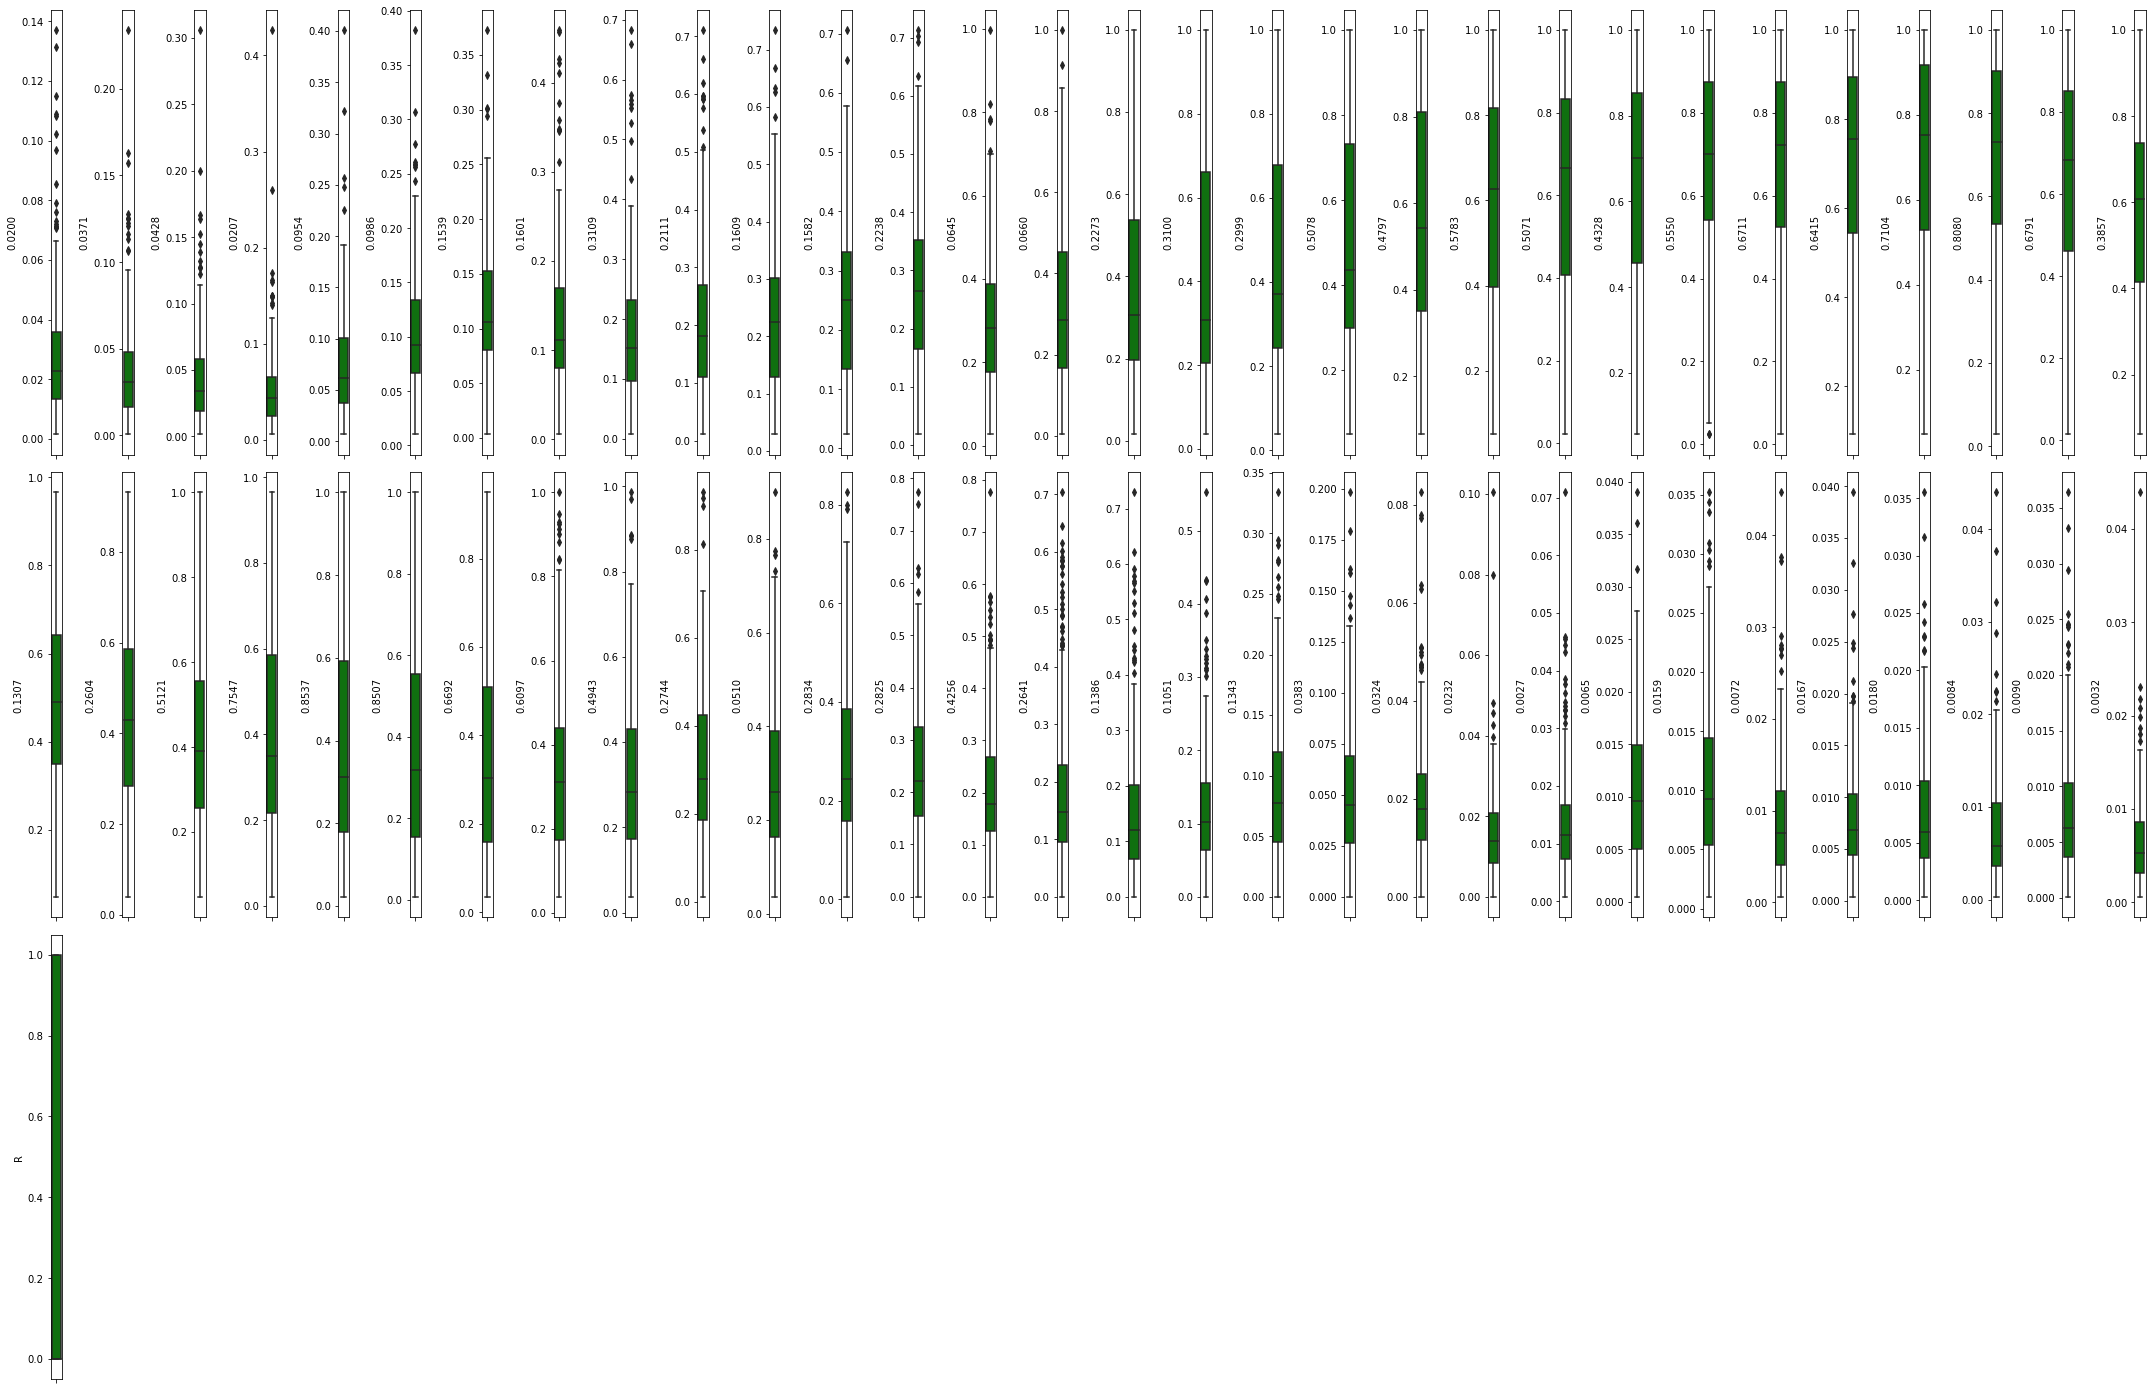

In [13]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [14]:
df.skew()

0.0200    2.122983
0.0371    2.149965
0.0428    2.645849
0.0207    3.397590
0.0954    2.020369
            ...   
0.0180    1.685823
0.0084    2.094443
0.0090    1.736231
0.0032    2.769687
R         0.146372
Length: 61, dtype: float64

In [15]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(207, 61)

In [16]:
threshold=3
print(np.where(z>3))

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
        84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
       100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
       131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
       135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
       139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
       145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
       146, 146, 146, 160, 183, 185, 185, 185], dtype=int64), array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
       47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
        2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
        0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
       51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 45, 59, 53

In [17]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(207, 61)
(167, 61)


In [18]:
loss_percent=(158-152)/158*100
print(loss_percent)

3.79746835443038


In [19]:
df_x=np.array(df_x)

In [22]:
y=le.transform(df_y)

C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
        print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [29]:
#Lets initialise the data frame with columns model and f1_score
df_models=pd.DataFrame(columns=["model","f1_score","std"])
models=list()
f1_scr=list()
std=list()

In [1]:
#lets use Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
maxf1_score(lr,df_x,y)

NameError: name 'maxf1_score' is not defined

maximum f1_score is at random state : 70  and it is : 0.9473684210526315

In [31]:
#lets use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,df_x,y)

maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 42  and it is : 0.742857142857143
maximum f1_score is at random state : 50  and it is : 0.7999999999999999
maximum f1_score is at random state : 50  and it is : 0.7999999999999999
maximum f1_score is at random state : 50  and it is : 0.7999999999999999
maximum f1_score is at random state : 50  and it is : 0.7999999999999999
maximum f1_score is at random state : 50  and it is : 0.7999999999999999
maximum f1_score is at random state : 50  and it is : 0.799

In [32]:
#lets us knn
#for knn we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5, scoring='f1')
clf.fit(df_x,y)
clf.best_params_

{'n_neighbors': 1}

In [33]:
kc=KNeighborsClassifier(n_neighbors=1)
maxf1_score(kc,df_x,y)


maximum f1_score is at random state : 42  and it is : 0.7027027027027027
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is : 0.8717948717948718
maximum f1_score is at random state : 43  and it is

maximum f1_score is at random state : 89  and it is : 0.8947368421052632


In [37]:
df_models['model']=models
df_models['f1_score']=f1_scr
df_models

,model,f1_score,std


In [38]:
#lr is performing best at random state = 70
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state = 70,test_size=0.20,stratify=y)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [40]:
#Model performance
from sklearn.metrics import confusion_metrix

ImportError: cannot import name 'confusion_metrix' from 'sklearn.metrics' (C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        19

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [43]:
#saving the model
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(lr, 'sonar_dataset_lr.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\externals\__init__.py)